Data: State of Connecticut - Accidental Drug Related Deaths 2012-2018

Source: https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

Big Idea: The opioid crisis is hitting the state of Connecticut hard, necessitating government funding for measures that will help combat the crisis - including expanding naloxone training for public employees and making addiction treatments accessible to people from a variety of economic backgrounds.

In [211]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ct_overdoses = pd.read_csv('Accidental_Drug_Related_Deaths_2012-2018.csv')
ct_overdoses.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/2014 0:00,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/2013 0:00,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/2016 0:00,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/2016 0:00,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/2013 0:00,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


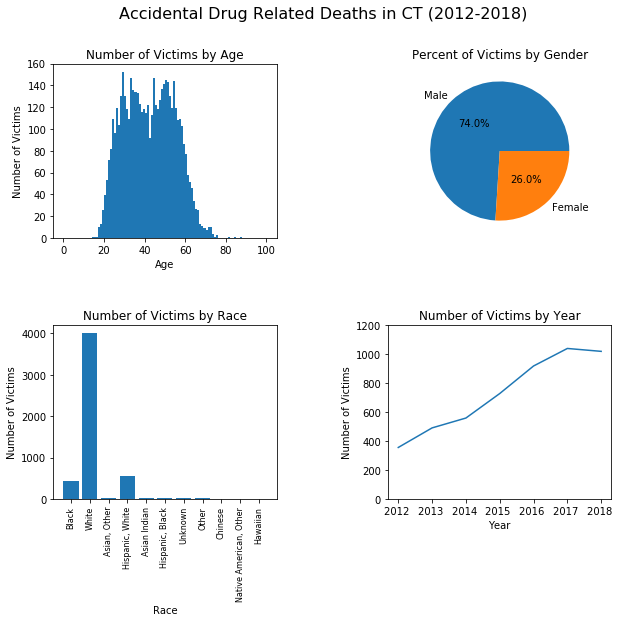

In [212]:
fig = plt.figure(figsize = (10,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
fig.suptitle('Accidental Drug Related Deaths in CT (2012-2018)', fontsize = 16)

#Histogram
ax1 = fig.add_subplot(2, 2, 1)
age = ct_overdoses['Age']
age = age.dropna()
plt.hist(age, range = (0,100), bins = 100)
plt.title('Number of Victims by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Victims')

#Pie Chart
ax2 = fig.add_subplot(2, 2, 2)
gender = ct_overdoses['Sex']
num_male = len(gender[gender == 'Male'])
num_female = len(gender[gender == 'Female'])
num_male_female = [num_male, num_female]
gender_labels = ['Male', 'Female']
plt.pie(num_male_female, labels = gender_labels, autopct = '%1.1f%%', pctdistance = .55)
plt.title('Percent of Victims by Gender')

#Bar Chart
ax3 = fig.add_subplot(2, 2, 3)
race = ct_overdoses['Race']
race = race.dropna()
race_list = race.unique().tolist()
num_race = []
for i in race_list:
    y = 0
    for x in race:
        if i == x:
            y += 1
    num_race.append(y)
plt.bar(race_list, num_race)
plt.xticks(rotation = 90, FontSize = 8)
plt.title('Number of Victims by Race')
ax3.set_xlabel('Race')
ax3.set_ylabel('Number of Victims')

#Line Chart
ax4 = fig.add_subplot(2, 2, 4)
ct_overdoses['Date'] = ct_overdoses['Date'].str.rstrip('0:00')
year = ct_overdoses['Date'].str[-5:]
year = year.dropna()
year_list = year.unique().tolist()
year_list.sort()
num_year = []
for i in year_list:
    y = 0
    for x in year:
        if i == x:
            y += 1
    num_year.append(y)
plt.plot(year_list, num_year)
plt.yticks(np.arange(0, 1201, 200))
plt.title('Number of Victims by Year')
ax4.set_xlabel('Year')
ax4.set_ylabel('Number of Victims')

fig.show()